<a href="https://colab.research.google.com/github/LuLu1-1/General-data-analysis/blob/main/Supply_chain_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/') 

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
import pickle
with open('/content/gdrive/MyDrive/supply_chain_data/data.pkl', 'rb') as file:
    data = pickle.load(file)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130590 entries, 0 to 130589
Data columns (total 59 columns):
 #   Column                         Non-Null Count   Dtype    
---  ------                         --------------   -----    
 0   Type                           130590 non-null  object   
 1   Days for shipping (real)       130590 non-null  int64    
 2   Days for shipment (scheduled)  130590 non-null  int64    
 3   Benefit per order              130590 non-null  float64  
 4   Sales per customer             130590 non-null  float64  
 5   Delivery Status                130590 non-null  object   
 6   Late_delivery_risk             130590 non-null  float64  
 7   Category Id                    130590 non-null  float64  
 8   Category Name                  130590 non-null  object   
 9   Customer City                  130590 non-null  object   
 10  Customer Country               130590 non-null  object   
 11  Customer Email                 130590 non-null  object   
 12  Cu

predict fraud

In [ ]:
data['fraud'] = np.where(data['Order Status']=='SUSPECTED_FRAUD',1,0)
data['late_delivery'] = np.where(data['Delivery Status']=='Late delivery',1,0)
data['Customer Zipcode'] = data['Customer Zipcode'].fillna(0)

In [ ]:
data1 = data.copy()
del_cols = ['Customer Email','Product Image','Customer Password','Customer Fname','Customer Lname','Order Status','Delivery Status'
        ,'Order Zipcode', 'Product Description','Customer Full Name','Customer Street','Product Status'
        ,'Order Item Id','shipping date (DateOrders)','order date (DateOrders)']
data1.drop(del_cols,axis=1,inplace=True )

In [ ]:
categorical_cols = data1.select_dtypes(include='object').columns
numerical_cols = data1.select_dtypes(exclude='object').columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in categorical_cols:
    data1[column] = le.fit_transform(data1[column])

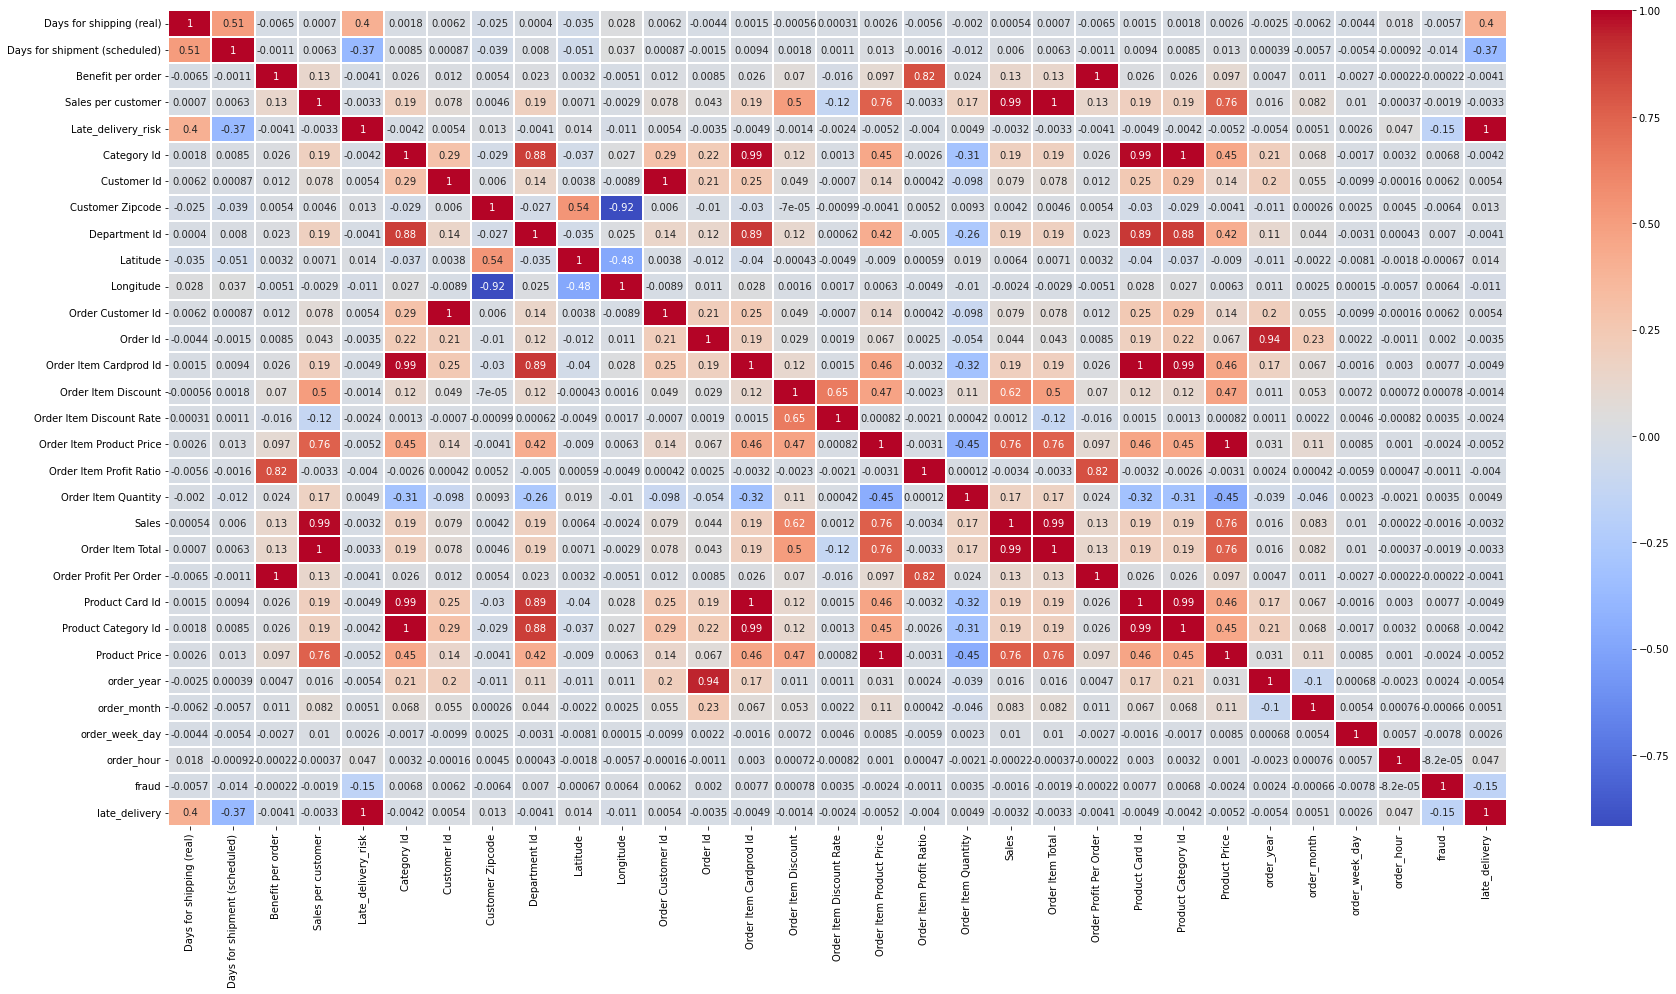

In [ ]:
plt.figure(figsize=(30,15))
temp = data1[numerical_cols]
sns.heatmap(temp.corr(), cmap='coolwarm', annot=True, linewidths=1)
plt.show()

In [ ]:
data1.drop([ 'Order Customer Id','Benefit per order','Product Category Id','Sales','Order Item Total','Order Item Cardprod Id', 'Product Price','Late_delivery_risk'],axis = 1, inplace=True)

In [ ]:
data1.drop('order_month_year',axis = 1, inplace=True)

In [ ]:
data1['fraud'].value_counts()/len(data1['fraud'])

0    0.981714
1    0.018286
Name: fraud, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
#predict fraud
x_fraud = data1.loc[:, data1.columns != 'fraud']
y_fraud = data1['fraud']
x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test = train_test_split(x_fraud, y_fraud, test_size=0.2,random_state=11,stratify=y_fraud)

# predict late_delivery
x_late = data1.loc[:, data1.columns != 'late_delivery']
y_late = data1['late_delivery']
x_late_train, x_late_test, y_late_train, y_late_test = train_test_split(x_late, y_late, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_fraud_train = sc.fit_transform(x_fraud_train)
x_fraud_test = sc.transform(x_fraud_test)
x_late_train = sc.fit_transform(x_late_train)
x_late_test = sc.transform(x_late_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score
# model evaluation
def model_stats(model, x_train, x_test, y_train, y_test, name='Fraud'):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    confusion = confusion_matrix(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
   
    print('Model used:', model)
    print('{} Accuracy: {}%'.format(name, accuracy*100))
    print('{} Recall: {}%'.format(name, recall*100))
    print('{} Confusion Matrix:\n {}'.format(name, confusion))
    print('{} F1 Score: {}%'.format(name, f1*100))
    return accuracy, recall, f1

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
LR_fraud = LogisticRegression()
LR_late = LogisticRegression()

acc_fraud, recall_fraud, f1_fraud = model_stats(LR_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
print('===========================================')
acc_late, recall_late, f1_late = model_stats(LR_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

Model used: LogisticRegression()
Fraud Accuracy: 98.21578987671337%
Fraud Recall: 23.221757322175733%
Fraud Confusion Matrix:
 [[25541    99]
 [  367   111]]
Fraud F1 Score: 32.26744186046512%
Model used: LogisticRegression()
Late Delivery Accuracy: 98.98154529443296%
Late Delivery Recall: 100.0%
Late Delivery Confusion Matrix:
 [[11184   266]
 [    0 14668]]
Late Delivery F1 Score: 99.10141206675225%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_fraud = DecisionTreeClassifier()
tree_late = DecisionTreeClassifier()
# 模型训练和评估
acc_fraud, recall_fraud, f1_fraud = model_stats(tree_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
print('===========================================')
acc_late, recall_late, f1_late = model_stats(tree_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

Model used: DecisionTreeClassifier()
Fraud Accuracy: 98.96623018607856%
Fraud Recall: 73.22175732217573%
Fraud Confusion Matrix:
 [[25498   142]
 [  128   350]]
Fraud F1 Score: 72.16494845360825%
Model used: DecisionTreeClassifier()
Late Delivery Accuracy: 99.16915537177425%
Late Delivery Recall: 99.14098718298337%
Late Delivery Confusion Matrix:
 [[11359    91]
 [  126 14542]]
Late Delivery F1 Score: 99.25941094160609%


In [ ]:
from xgboost import XGBClassifier
XGB_fraud = XGBClassifier()
XGB_late = XGBClassifier()

acc_fraud, recall_fraud, f1_fraud = model_stats(XGB_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
print('===========================================')
acc_late, recall_late, f1_late = model_stats(XGB_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

Model used: XGBClassifier()
Fraud Accuracy: 98.21196109962477%
Fraud Recall: 15.062761506276152%
Fraud Confusion Matrix:
 [[25579    61]
 [  406    72]]
Fraud F1 Score: 23.56792144026187%
Model used: XGBClassifier()
Late Delivery Accuracy: 98.98154529443296%
Late Delivery Recall: 100.0%
Late Delivery Confusion Matrix:
 [[11184   266]
 [    0 14668]]
Late Delivery F1 Score: 99.10141206675225%


In [ ]:
np.where(XGB_fraud.feature_importances_==0)

(array([ 3,  4,  5,  7,  9, 12, 13, 16, 20, 21, 22, 23, 24, 25, 28, 29, 31]),)

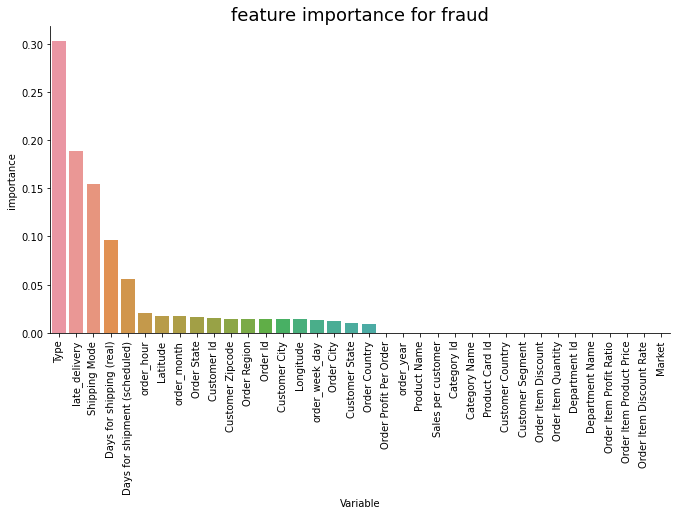

In [ ]:
#fraud features
fraud_important_col = XGB_fraud.feature_importances_.argsort()[::-1]
fraud_feat_importance = pd.DataFrame({'Variable':x_fraud.columns[fraud_important_col], 'importance': XGB_fraud.feature_importances_[fraud_important_col]})
sns.catplot(x='Variable', y='importance', data=fraud_feat_importance, kind='bar',height=5,aspect=2)
plt.xticks(rotation=90)
plt.title('feature importance for fraud',fontsize=18)
plt.show()

fraud is related to 'Type', 'late_dilivery', 'shipping mode', 'days for shipping(real)', 'days for shipping (scheduled)'

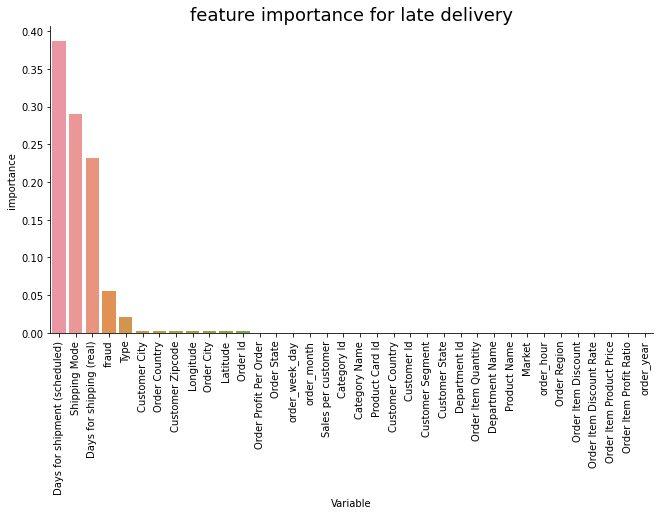

In [ ]:
#late features
late_important_col = XGB_late.feature_importances_.argsort()[::-1]
late_feat_importance = pd.DataFrame({'Variable':x_late.columns[late_important_col], 'importance': XGB_late.feature_importances_[late_important_col]})
sns.catplot(x='Variable', y='importance', data=late_feat_importance, kind='bar',height=5,aspect=2)
plt.xticks(rotation=90)
plt.title('feature importance for late delivery',fontsize=18)
plt.show()

late delivery coresponds to 'days for shipping(shceduled)', 'shipping mode', 'days for shipping (real)', 'fraud'

regression prediction

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def regression_model_stats(model, x_train, x_test, y_train, y_test, name='Sales'):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse= mean_squared_error(y_test,y_pred, squared=False)
    
    print('Model used:', model)
    print('{} MAE: {}%'.format(name, mae))
    print('{} MSE: {}%'.format(name, mse))
    print('{} RMSE: {}'.format(name, rmse))

    return mae, mse, rmse

In [ ]:
x_sales = data1.loc[:, data1.columns != 'Sales per customer']
y_sales = data1['Sales per customer']
x_sales_train, x_sales_test, y_sales_train, y_sales_test = train_test_split(x_sales, y_sales, test_size=0.2,random_state=1)

x_quantity = data1.loc[:, data1.columns != 'Order Item Quantity']
y_quantity = data1['Order Item Quantity']
x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test = train_test_split(x_quantity, y_quantity, test_size=0.2,random_state=2)

In [ ]:
sc = StandardScaler()
x_sales_train = sc.fit_transform(x_sales_train)
x_sales_test = sc.transform(x_sales_test)
x_quantity_train = sc.fit_transform(x_quantity_train)
x_quantity_test = sc.transform(x_quantity_test)

In [ ]:
from sklearn.linear_model import LinearRegression
LR_Sales = LinearRegression()
LR_Quantity = LinearRegression()
mae, mse, rmse = regression_model_stats(LR_Sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, 'Sales')
print('===========================================')
mae, mse, rmse = regression_model_stats(LR_Sales, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, 'Quantity')

Model used: LinearRegression()
Sales MAE: 18.889297515038518%
Sales MSE: 1003.3757895315074%
Sales RMSE: 31.67610755019479
Model used: LinearRegression()
Quantity MAE: 0.36128457873348363%
Quantity MSE: 0.3016165065043969%
Quantity RMSE: 0.5491962367900903


In [ ]:
from xgboost import XGBRegressor
XGB_Sales = XGBRegressor()
XGB_Quantity = XGBRegressor()
mae, mse, rmse = regression_model_stats(XGB_Sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, 'Sales')
print('===========================================')
mae, mse, rmse = regression_model_stats(XGB_Sales, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, 'Quantity')

[15:29:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model used: XGBRegressor()
Sales MAE: 3.899122088399606%
Sales MSE: 33.16113445461489%
Sales RMSE: 5.758570521806162
[15:29:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model used: XGBRegressor()
Quantity MAE: 0.0709020887393208%
Quantity MSE: 0.013282116069461938%
Quantity RMSE: 0.11524806319180353


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
## 每轮循环中计算各个变量的VIF，并删除VIF>threshold 的变量
def vif(X, thres=10.0):
    col = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:,col].values, ix)
               for ix in range(X.iloc[:,col].shape[1])]
        
        maxvif = max(vif)
        maxix = vif.index(maxvif)
        if maxvif > thres:
            del col[maxix]
            print('delete=',X_train.columns[col[maxix]],'  ', 'vif=',maxvif )
            dropped = True
    print('Remain Variables:', list(X.columns[col]))
    print('VIF:', vif)
    return list(X.columns[col]) 

In [ ]:
vif_info = pd.DataFrame()
vif_info['exog'] = exog_names[1:]
vif_info['VIF'] = [variance_inflation_factor(exog, i+1) for i in range(exog.shape[1]-1)]
vif_info = vif_info.sort_values('VIF', ascending=False)
print(vif_info)

In [ ]:
def get_var_no_colinear(cutoff, df):
    corr_high = df.corr().applymap(lambda x: np.nan if x>cutoff else x).isnull()
    col_all = corr_high.columns.tolist()
    del_col = []
    i = 0
    while i < len(col_all)-1:
        ex_index = corr_high.iloc[:,i][i+1:].index[np.where(corr_high.iloc[:,i][i+1:])].tolist()
        for var in ex_index:
            col_all.remove(var)
        corr_high = corr_high.loc[col_all, col_all]
        i += 1
    return col_all